In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# import SpatialDE
# import NaiveDE
# import SpaGCN as spg
# from scipy.sparse import issparsez
import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc

In [2]:
import sys
sys.path.append('../../')

from plotting import cellscollocplot

import utils

# Config

In [13]:
# set global rc parameters
# sc.settings.set_figure_params(vector_friendly=True)

utils.config_rc(dpi=300, font_size=6)
# mpl.rcParams
wk_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))

In [4]:

MB_data_root = utils.get_path('MB_wk_root', json_path=os.path.join(wk_root, '_data.json'))
adata = sc.read_h5ad(os.path.join(MB_data_root, 'adata_mouse_brain.h5ad'))

spearman_df =pd.read_csv(os.path.join(MB_data_root, 'mouse_brain_celltype_colocalization.csv')).set_index('Unnamed: 0')
spearman_df.index.name='ct'

# spearman_df.head()
for i in range(spearman_df.shape[0]):
    spearman_df.iloc[i,i] = -1

In [5]:
adata

AnnData object with n_obs × n_vars = 5150 × 24038
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'SpaSEG_discrete_clusters', 'SpaSEG_clusters', 'spot_neighbors'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'SpaSEG_clusters_colors', 'domain_lr_means', 'metrics', 'pca', 'spatial_neighbors'
    obsm: 'X_pca', 'cell_types', 'spatial', 'spot_lr_padj', 'spot_lr_score'
    varm: 'PCs'
    layers: 'count'
    obsp: 'spatial_connectivities', 'spatial_distances'

In [6]:
spearman_df.loc['Ext_Thal_1','Ext_L5_2']

0.1287940924698636

In [7]:
# get the most coorellated cell type 
col_collocal = pd.DataFrame(index = spearman_df.index)
col_collocal['col_ct'] = spearman_df.idxmax()
col_collocal['spearman'] = spearman_df.max()


In [8]:
analysis_cts = ['Ext_Hpc_CA1', 'Ext_Hpc_CA2', 'Ext_Hpc_CA3', 'Ext_Hpc_DG1', 'Astro_HPC', 'Ext_L23', 'Ext_L25', 'Ext_L56', 'Ext_L5_1', 'Ext_L5_2', 'Ext_L5_3', 'Ext_L6B', 'Astro_AMY_CTX', 'Ext_Thal_1', 'Ext_Thal_2']
ana_ct_df = col_collocal.loc[analysis_cts,:].copy()
ana_ct_df.drop_duplicates(inplace=True)

In [9]:
ana_ct_df

,col_ct,spearman
ct,,
Ext_Hpc_CA1,Ext_Hpc_DG2,0.931337
Ext_Hpc_CA2,Ext_Hpc_CA1,0.836780
Ext_Hpc_CA3,Ext_Hpc_CA2,0.765159
Ext_Hpc_DG1,Ext_Hpc_DG2,0.984782
Astro_HPC,Astro_STR,0.949494
Ext_L23,Ext_L25,0.946479
Ext_L25,Ext_L5_1,0.975104
Ext_L56,Ext_L6,0.962139
Ext_L5_1,Ext_L25,0.975104


In [10]:
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
clist1 = ['#f0f0f0','#dfc27d','#a6611a']
clist2 = ['#f0f0f0','#80cdc1','#018571']

clist3 = ['#f0f0f0','#f1b6da','#d01c8b']
clist4 = ['#f0f0f0','#b8e186','#4dac26']

clist5 = ['#f0f0f0','#fdb863','#e66101']
clist6 = ['#f0f0f0','#b2abd2','#5e3c99']

clist7 = ['#f0f0f0','#f4a582','#ca0020']
clist8 = ['#f0f0f0','#92c5de','#0571b0']

cmap1 = LinearSegmentedColormap.from_list('cmap1',clist1,N=256)
cmap2 = LinearSegmentedColormap.from_list('cmap2',clist2,N=256)
cmap3 = LinearSegmentedColormap.from_list('cmap3',clist3,N=256)
cmap4 = LinearSegmentedColormap.from_list('cmap4',clist4,N=256)
cmap5 = LinearSegmentedColormap.from_list('cmap5',clist5,N=256)
cmap6 = LinearSegmentedColormap.from_list('cmap6',clist6,N=256)
cmap7 = LinearSegmentedColormap.from_list('cmap7',clist7,N=256)
cmap8 = LinearSegmentedColormap.from_list('cmap8',clist8,N=256)

In [11]:
# sns.color_palette(clist2)

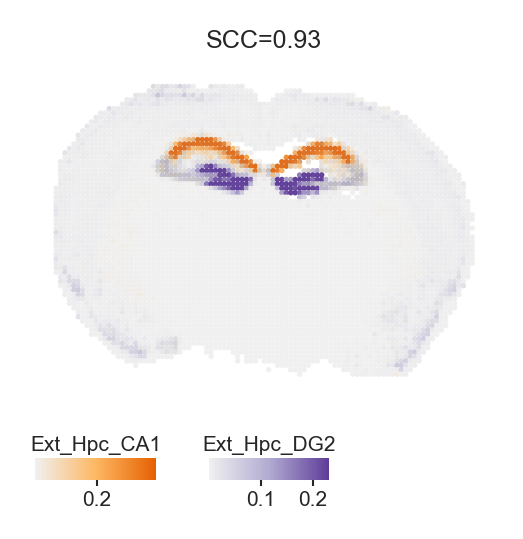

In [14]:
cts = ['Ext_Hpc_CA1','Ext_Hpc_DG2']
ax = cellscollocplot(adata, cts, cmaps=[cmap5,cmap6], fig_w = 5*utils.centimeter,
                     fig_h = 4*utils.centimeter, spot_size=1,size=1, alpha_scaling=1.0,marker='o',rasterized=True)
ax.set_title('SCC={0:.2f}'.format(0.931337))
plt.savefig(os.path.join(wk_root, "notebook/results/CCI/MB_coloc_{0}.pdf".format('|'.join(cts))), bbox_inches='tight', format='pdf', dpi=400)

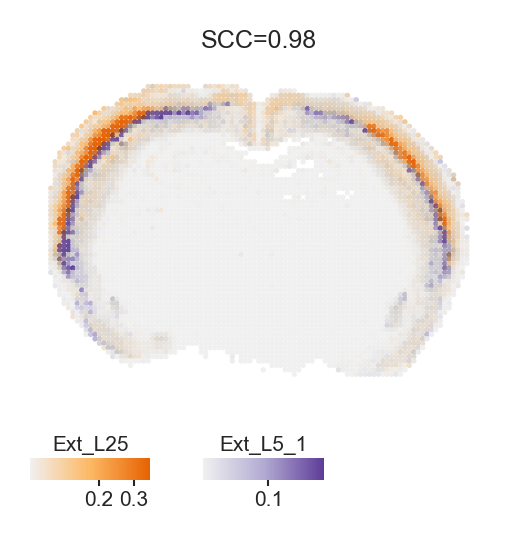

In [15]:
cts=['Ext_L25','Ext_L5_1']
ax = cellscollocplot(adata, cts, cmaps=[cmap5,cmap6], fig_w = 5*utils.centimeter,
                     fig_h = 4*utils.centimeter, spot_size=1,size=1, alpha_scaling=1.0,marker='o',rasterized=True)
ax.set_title('SCC={0:.2f}'.format(0.975104))
plt.savefig(os.path.join(wk_root, "notebook/results/CCI/MB_coloc_{0}.pdf".format('|'.join(cts))), bbox_inches='tight', format='pdf', dpi=400)

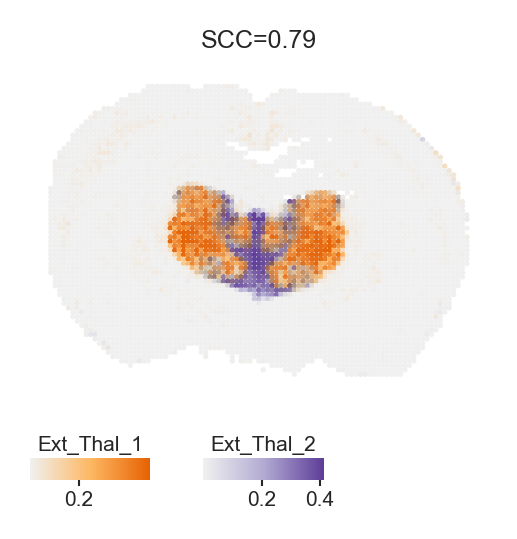

In [16]:
cts = ['Ext_Thal_1','Ext_Thal_2']
ax = cellscollocplot(adata, cts, cmaps=[cmap5,cmap6], fig_w = 5*utils.centimeter,
                     fig_h = 4*utils.centimeter, spot_size=1,size=1, alpha_scaling=1.0,marker='o',rasterized=True)
ax.set_title('SCC={0:.2f}'.format(0.793361))
plt.savefig(os.path.join(wk_root, "notebook/results/CCI/MB_coloc_{0}.pdf".format('|'.join(cts))), bbox_inches='tight', format='pdf', dpi=400)

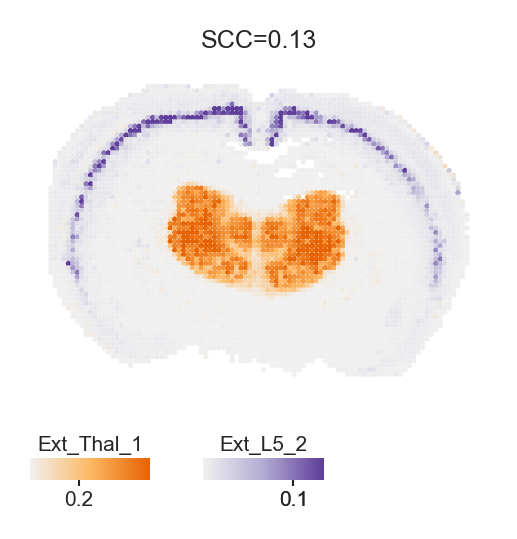

In [17]:
cts = ['Ext_Thal_1','Ext_L5_2']
ax = cellscollocplot(adata, cts, cmaps=[cmap5,cmap6], fig_w = 5*utils.centimeter,
                     fig_h = 4*utils.centimeter, spot_size=1,size=1, alpha_scaling=1.0,marker='o',rasterized=True)
ax.set_title('SCC={0:.2f}'.format(0.1287940924698636))
plt.savefig(os.path.join(wk_root, "notebook/results/CCI/MB_coloc_{0}.pdf".format('|'.join(cts))), bbox_inches='tight', format='pdf', dpi=400)

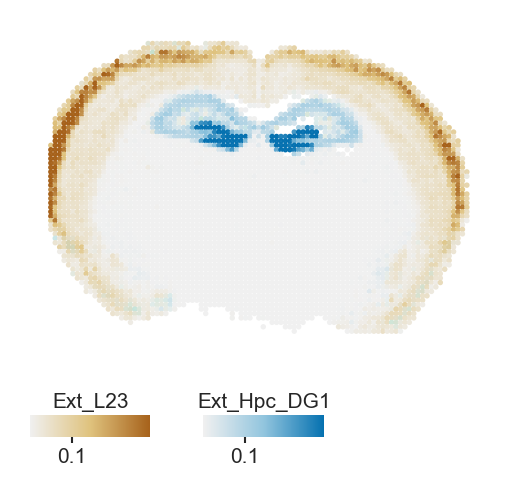

In [44]:
cts = ['Ext_L23','Ext_Hpc_DG1']
ax = cellscollocplot(adata, cts, cmaps=[cmap1,cmap8], fig_w = 5*utils.centimeter,
                     fig_h = 4*utils.centimeter, spot_size=1,size=1, alpha_scaling=1.0,marker='o',rasterized=True)
plt.savefig(os.path.join(wk_root, "notebook/results/CCI/MB_coloc_{0}.pdf".format('|'.join(cts))), bbox_inches='tight', format='pdf', dpi=400)